In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\marry\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r'C:\Users\marry\Desktop\household_power_consumption.txt', sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
df.shape

(2075259, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [7]:
# mark all missing values
df.replace('?', 'nan', inplace=True)

In [8]:
# add a column for for the remainder of sub metering
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [13]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.099998


In [9]:
df.fillna(method= 'ffill', inplace= True)

In [10]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64

In [11]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2075259, freq=None)

In [12]:
#Downsample to daily data points
df_daily = df.resample('D').sum()
print(df_daily)

            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   
...                         ...                    ...        ...   
2010-11-22             2041.536                142.354  345883.85   
2010-11-23             1577.536                137.450  346428.76   
2010-11-24             1796.248                132.460  345644.59   
2010-11-25             1431.164                116.128  347812.21   
2010-11-26             1488.104                120.826  303487.57   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime              

In [13]:
# downsampling to monthly data points
df_monthly = df.resample('M').mean()
print(df_monthly)

            Global_active_power  Global_reactive_power     Voltage  \
datetime                                                             
2006-12-31             1.901537               0.131400  241.440835   
2007-01-31             1.546085               0.132683  240.904831   
2007-02-28             1.401165               0.113634  240.519177   
2007-03-31             1.318606               0.114747  240.513524   
2007-04-30             0.856787               0.126467  239.127693   
2007-05-31             0.985862               0.115343  235.178364   
2007-06-30             0.826887               0.146355  238.877480   
2007-07-31             0.668133               0.128498  237.678656   
2007-08-31             0.763909               0.112822  237.936632   
2007-09-30             0.969442               0.126019  239.423948   
2007-10-31             1.103945               0.093458  239.725907   
2007-11-30             1.294496               0.096552  240.869308   
2007-12-31          

Text(0.5, 1.0, 'Downsampled Data')

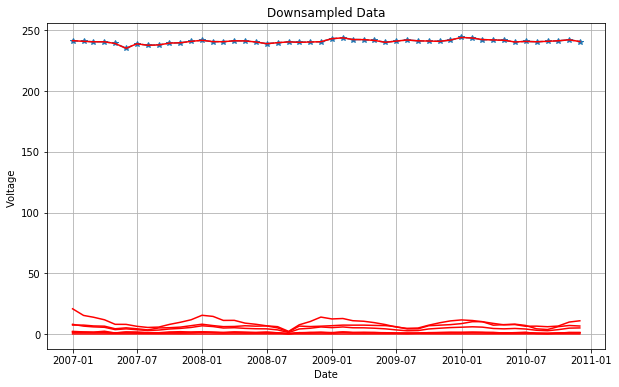

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df_monthly.index, df_monthly.Voltage , '--',marker='*')
plt.plot(df_monthly, 'red')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Voltage ')
plt.title('Downsampled Data')  ## this is just trying out a visualization, more insights from the statistical test

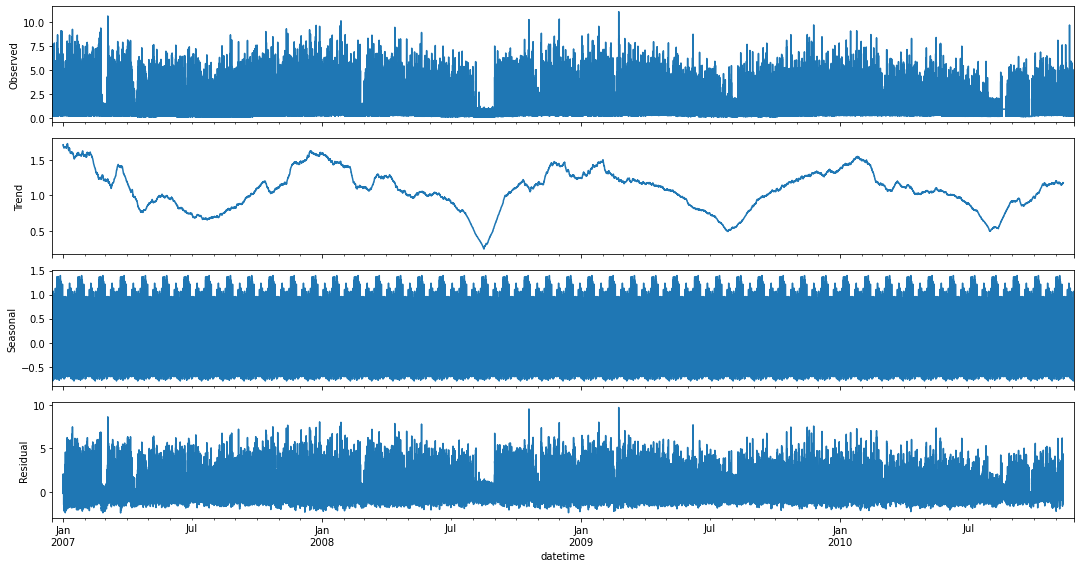

In [15]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30) )
decompose_series.plot()
plt.show()

## Time Series Specific Exploratory Methods

### Running for Voltage

In [16]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Voltage'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -2.9069025471609766
p-value: 0.044551192944501286
No. of lags used: 23
No. of observations used : 1418
Critical Values:
   1%: -3.4349700122033804
   5%: -2.8635804131233096
   10%: -2.567856305330816


In [17]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Voltage'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -2.5830134022383446
p-value: 0.09655911979111304
No. of lags used: 1
No. of observations used : 46
Critical Values:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675


We can observe here that for monthly we had a non stationary state while Daily showed it was stationary..
This simply means we can carry out log differencing on the montly to make it staionary, that is if we chose to

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Sub_metering_1'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -5.306040780803433
p-value: 5.320073775293654e-06
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


In [19]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Sub_metering_1'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -5.289932183295271
p-value: 5.744808378575235e-06
No. of lags used: 0
No. of observations used : 47
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064


We can see here that both daily and monthly gave values of P < 0.05 which signifies **stationarity**

In [20]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -4.616468415751823
p-value: 0.0001204364420014936
No. of lags used: 9
No. of observations used : 38
Critical Values:
   1%: -3.6155091011809297
   5%: -2.941262357486514
   10%: -2.6091995013850418


In [21]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.760052310213783
p-value: 0.0033435208887409064
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


In [22]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Sub_metering_3'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.4894037656426065
p-value: 0.008263434668745635
No. of lags used: 1
No. of observations used : 46
Critical Values:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675


In [23]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Sub_metering_3'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -4.347373036348708
p-value: 0.0003673879254684068
No. of lags used: 23
No. of observations used : 1418
Critical Values:
   1%: -3.4349700122033804
   5%: -2.8635804131233096
   10%: -2.567856305330816


In [24]:
from fbprophet import Prophet

In [25]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933594
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.667969
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433594
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900391
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800781


In [26]:
df_monthly2 = df_monthly.reset_index() 

In [27]:
df_monthly2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847,20.814259
1,2007-01-31,1.546085,0.132683,240.904831,6.547133,1.264180,1.775851,7.383759,15.344292
2,2007-02-28,1.401165,0.113634,240.519177,5.914911,1.180159,1.602282,6.704067,13.866244
3,2007-03-31,1.318606,0.114747,240.513524,5.572890,1.361313,2.346819,6.504503,11.764133
4,2007-04-30,0.856787,0.126467,239.127693,3.685574,0.974028,0.889282,4.386644,8.029823


In [28]:
df_monthly2 = df_monthly2[['datetime','Global_active_power']]

In [29]:
new_df = df_monthly2.rename(columns={"datetime": "ds", "Global_active_power": "y"})
new_df.head()

,ds,y
0,2006-12-31,1.901537
1,2007-01-31,1.546085
2,2007-02-28,1.401165
3,2007-03-31,1.318606
4,2007-04-30,0.856787


In [30]:
model = Prophet()
model.fit(new_df) # Observe here that this new_df was from the downsampled data i.e. df_monthly

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M') 
forecast = model.predict(future) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-31,1.170982,1.531349,1.731673,1.170982,1.170982,0.461804,0.461804,0.461804,0.461804,0.461804,0.461804,0.0,0.0,0.0,1.632786
1,2007-01-31,1.168197,1.393650,1.589495,1.168197,1.168197,0.323716,0.323716,0.323716,0.323716,0.323716,0.323716,0.0,0.0,0.0,1.491913
2,2007-02-28,1.165681,1.319543,1.517593,1.165681,1.165681,0.250739,0.250739,0.250739,0.250739,0.250739,0.250739,0.0,0.0,0.0,1.416420
3,2007-03-31,1.162896,1.173215,1.359883,1.162896,1.162896,0.103693,0.103693,0.103693,0.103693,0.103693,0.103693,0.0,0.0,0.0,1.266589
4,2007-04-30,1.160201,0.857082,1.053760,1.160201,1.160201,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,0.0,0.0,0.0,0.957264


In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-31,1.632786,1.531349,1.731673,1.170982,1.170982,1.170982
1,2007-01-31,1.491913,1.393650,1.589495,1.168197,1.168197,1.168197
2,2007-02-28,1.416420,1.319543,1.517593,1.165681,1.165681,1.165681
3,2007-03-31,1.266589,1.173215,1.359883,1.162896,1.162896,1.162896
4,2007-04-30,0.957264,0.857082,1.053760,1.160201,1.160201,1.160201


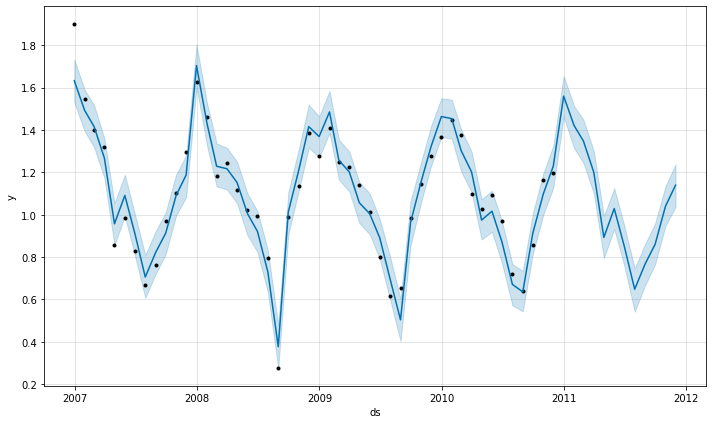

In [33]:
model.plot(forecast)
plt.show()      

In [34]:
df_daily.head

<bound method NDFrame.head of             Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   
...                         ...                    ...        ...   
2010-11-22             2041.536                142.354  345883.85   
2010-11-23             1577.536                137.450  346428.76   
2010-11-24             1796.248                132.460  345644.59   
2010-11-25             1431.164                116.128  347812.21   
2010-11-26             1488.104                120.826  303487.57   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_meteri

In [35]:
df_daily_df = df_daily.reset_index()

In [36]:
df_daily_df.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933594
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.667969
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433594
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900391
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800781


In [37]:
df_daily_df = df_daily_df[['datetime','Global_active_power']]

new_daily_df = df_daily_df.rename(columns={"datetime": "ds", "Global_active_power": "y"})

In [38]:
model_2 = Prophet()
model_2.fit(new_daily_df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#predict for the next 30 days
future = model_2.make_future_dataframe(periods=20, freq='D') 
forecast2 = model_2.predict(future) 
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1636.048354,1792.030743,2902.632934,1636.048354,1636.048354,685.573525,685.573525,685.573525,203.011530,203.011530,203.011530,482.561994,482.561994,482.561994,0.0,0.0,0.0,2321.621878
1,2006-12-17,1635.911096,1753.679385,2866.084518,1635.911096,1635.911096,667.541918,667.541918,667.541918,169.659455,169.659455,169.659455,497.882463,497.882463,497.882463,0.0,0.0,0.0,2303.453014
2,2006-12-18,1635.773838,1450.221026,2561.644211,1635.773838,1635.773838,380.220598,380.220598,380.220598,-133.339516,-133.339516,-133.339516,513.560114,513.560114,513.560114,0.0,0.0,0.0,2015.994436
3,2006-12-19,1635.636581,1618.404385,2686.464903,1635.636581,1635.636581,502.692035,502.692035,502.692035,-26.497762,-26.497762,-26.497762,529.189796,529.189796,529.189796,0.0,0.0,0.0,2138.328615
4,2006-12-20,1635.499323,1626.265502,2732.986856,1635.499323,1635.499323,543.177869,543.177869,543.177869,-1.187387,-1.187387,-1.187387,544.365256,544.365256,544.365256,0.0,0.0,0.0,2178.677191


In [40]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2321.621878,1792.030743,2902.632934,1636.048354,1636.048354,1636.048354
1,2006-12-17,2303.453014,1753.679385,2866.084518,1635.911096,1635.911096,1635.911096
2,2006-12-18,2015.994436,1450.221026,2561.644211,1635.773838,1635.773838,1635.773838
3,2006-12-19,2138.328615,1618.404385,2686.464903,1635.636581,1635.636581,1635.636581
4,2006-12-20,2178.677191,1626.265502,2732.986856,1635.499323,1635.499323,1635.499323


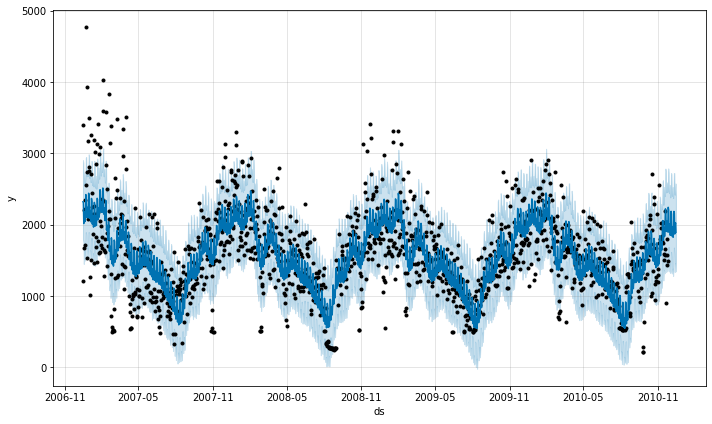

In [41]:
model_2.plot(forecast2)
plt.show()       